In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
from sklearn.utils import resample


In [2]:
df = pd.read_csv('Transform_data.csv', index_col = 0)
df.head()

,Rank,Rating,Target,DVD S,Movie,OVA,Other,TV,TV Sp,Web,...,Wuxia,Xianxia,Yakuza,Yaoi,Yaoi Hand Syndrome,Youkai,Yuri,Zombies,Zoo,noitaminA
0,-0.150170,0.673077,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.109314,0.670330,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.998596,0.750000,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-1.105398,0.763736,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.284450,0.554945,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
#Summary statistics
df.describe()

,Rank,Rating,Target,DVD S,Movie,OVA,Other,TV,TV Sp,Web,...,Wuxia,Xianxia,Yakuza,Yaoi,Yaoi Hand Syndrome,Youkai,Yuri,Zombies,Zoo,noitaminA
count,1.325400e+04,13254.000000,13254.000000,13254.000000,13254.000000,13254.000000,13254.000000,13254.000000,13254.000000,13254.000000,...,11449.000000,11449.000000,11449.000000,11449.000000,11449.000000,11449.000000,11449.000000,11449.000000,11449.000000,11449.000000
mean,-9.864182e-17,0.665366,0.041346,0.063981,0.191489,0.147729,0.059605,0.346386,0.048136,0.142674,...,0.001660,0.003232,0.002184,0.002795,0.000786,0.010132,0.000786,0.003930,0.000961,0.006027
std,1.000038e+00,0.113251,0.199097,0.244728,0.393488,0.354845,0.236762,0.475836,0.214063,0.349753,...,0.040705,0.056759,0.046680,0.052796,0.028028,0.100150,0.028028,0.062573,0.030983,0.077401
min,-1.627643e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-8.773048e-01,0.598901,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-6.279585e-02,0.667582,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8.756131e-01,0.733516,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2.225912e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Resample for even Target sample

In [5]:

df_majority = df[df.Target == 0]
df_minority = df[df.Target == 1]

#Undersample the majority class
df_majority_undersampled = resample(df_majority, replace = False,\
                                    n_samples = len(df_minority), random_state=42)

#Combine minority class with undersampled majority class
df_balanced = pd.concat([df_majority_undersampled, df_minority])

#Shuffle the DataFrame to mix the rows
df_balanced = df_balanced.sample(frac = 1, random_state = 42).reset_index(drop = True)

df_balanced.loc[:].fillna(0,inplace = True)

#Verify the new DataFrame
print(df_balanced.Zombies.value_counts())
df_balanced

df_balanced.to_csv('balanced_transformed_data.csv')

Zombies
0.0    1091
1.0       5
Name: count, dtype: int64


# Relationship between Target and Genres

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

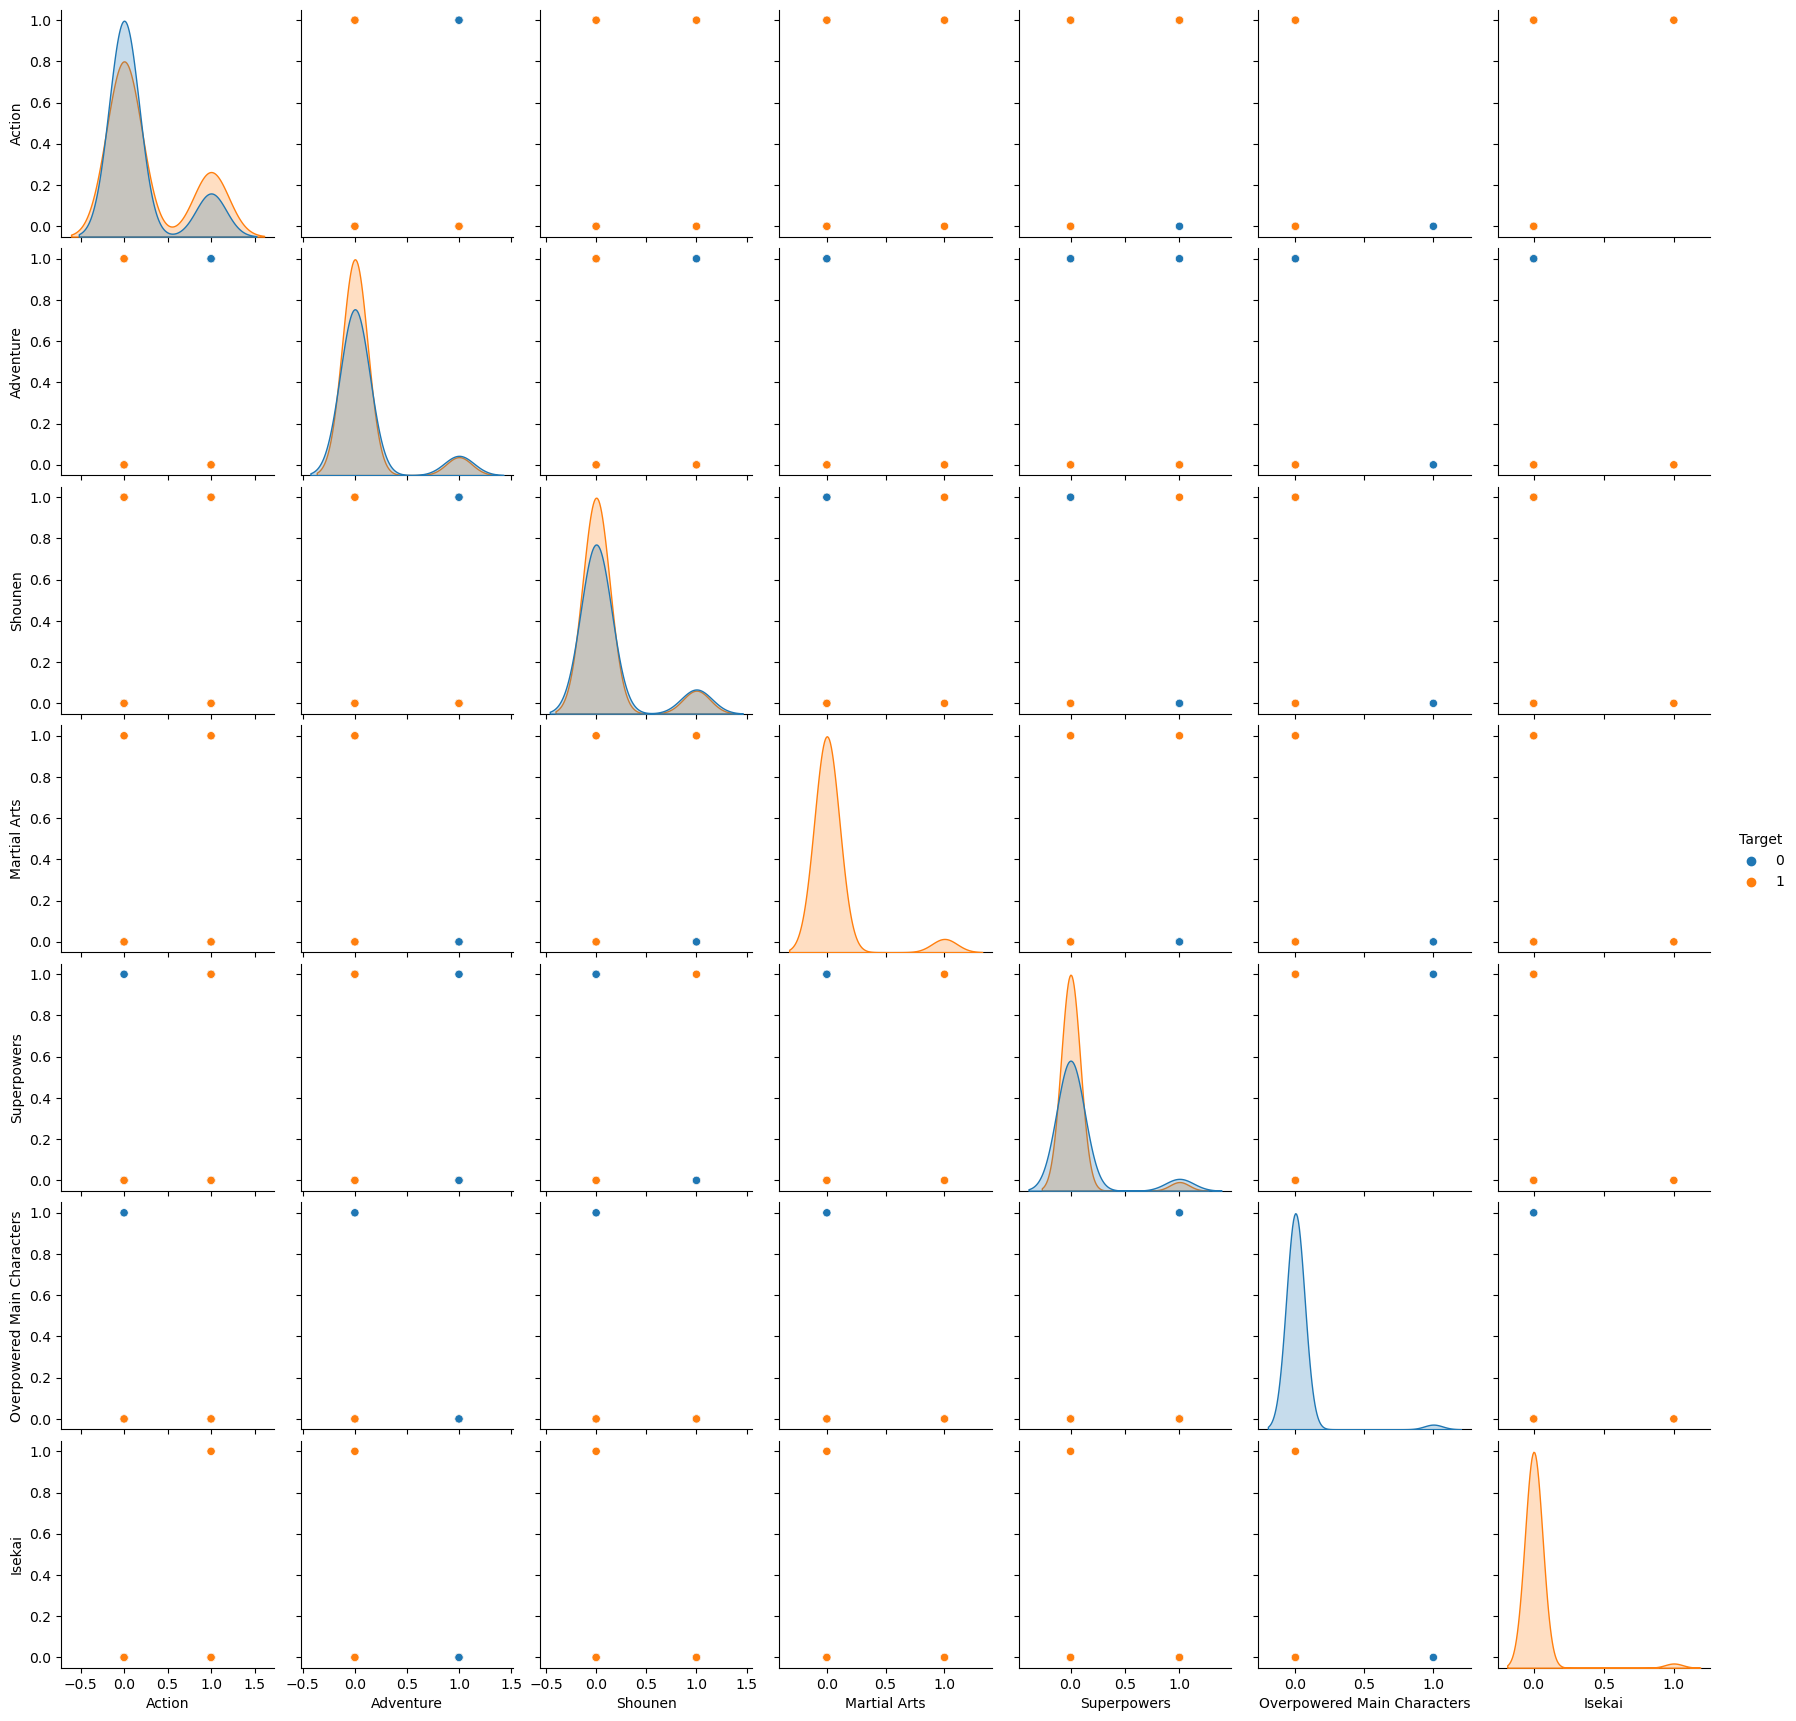

In [6]:
#Pair plot for first few features
sample_feature = df_balanced.loc[:,['Target','Action', 'Adventure',\
'Shounen','Martial Arts', 'Superpowers',\
                     'Overpowered Main Characters','Isekai']].sample(n=100, random_state=2)

sns.pairplot(sample_feature, hue = 'Target')

# Which Genre appears the most

Text(0.5, 0, 'Appearances')

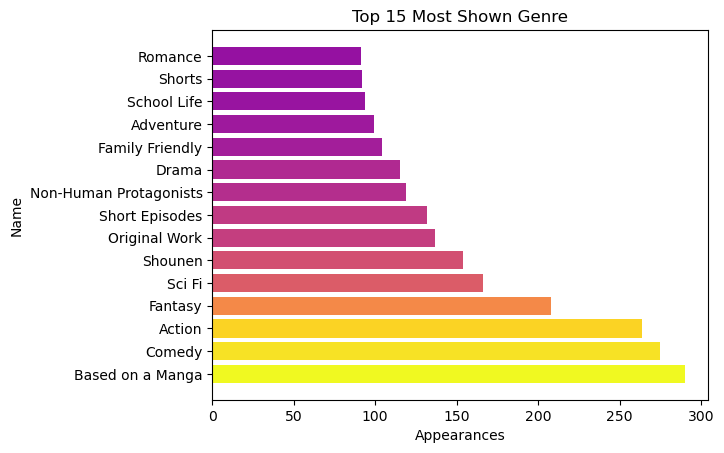

In [9]:
one_counts = df_balanced.loc[:, 'Action':].apply(lambda col:(col == 1.0).sum())

sorted_one_counts = one_counts.sort_values(ascending = False)
top_15 = sorted_one_counts.iloc[:15]
plt.barh(top_15.index, top_15.values, color=cm.plasma(top_15.values / max(top_15.values)))

plt.title('Top 15 Most Shown Genre')
plt.ylabel('Name')
plt.xlabel('Appearances')

# Relationship between Action and Overpowered Main Characters Genres on Rank and Rating

<Axes: xlabel='Overpowered Main Characters', ylabel='Rating'>

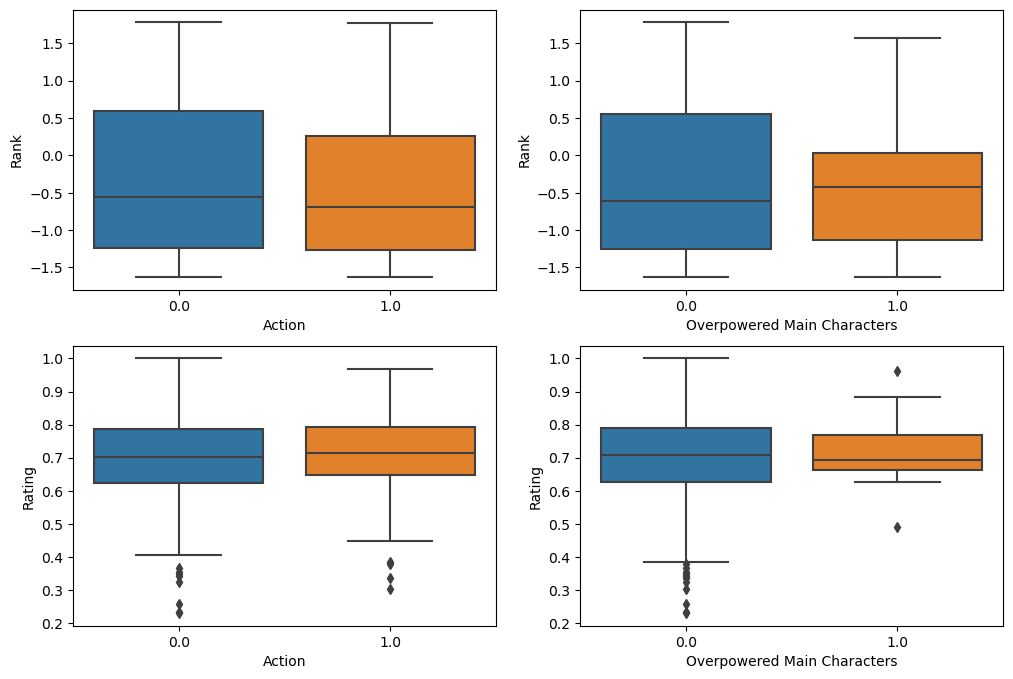

In [8]:

fig,axes = plt.subplots(nrows = 2, ncols = 2, figsize=(12,8))
sns.boxplot(ax = axes[0,0], data = df_balanced, x = 'Action', y = 'Rank')
sns.boxplot(ax = axes[0,1], data = df_balanced, x = 'Overpowered Main Characters', y = 'Rank')
sns.boxplot(ax = axes[1,0], data = df_balanced, x = 'Action', y = 'Rating')
sns.boxplot(ax = axes[1,1], data = df_balanced, x = 'Overpowered Main Characters', y = 'Rating')